# A Handwritten Digits Classifier

#### Why is image classification a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

#### Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. 

In this Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

#### Dataset used

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the [hand-written digits dataset from UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function. Then, we can visualize it using pyplot.imshow() function. To display multiple images in one matplotlib figure, we can use the equivalent axes.imshow() function.

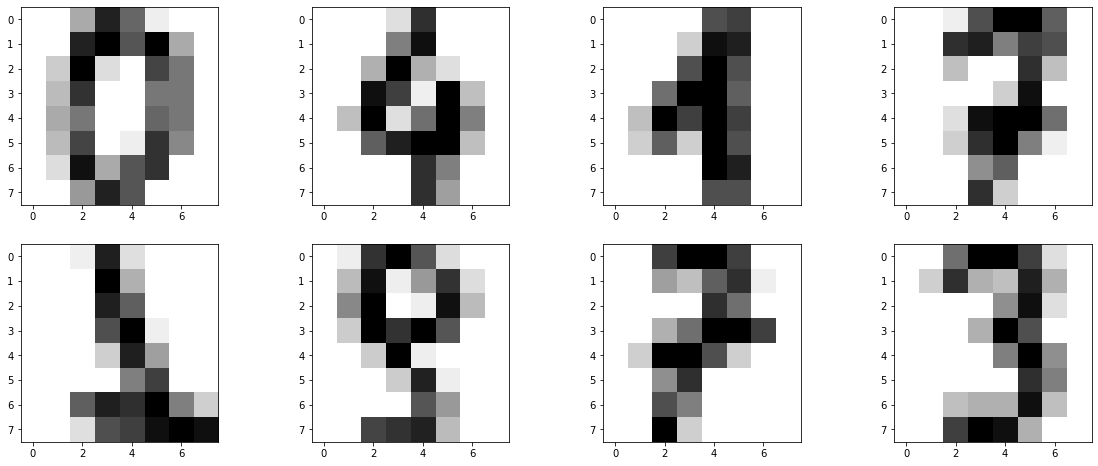

In [15]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

digits, target = load_digits(return_X_y = True)
digits = pd.DataFrame(digits)
target = pd.Series(target)

fig, axs = plt.subplots(2, 4, figsize=(20, 8))
rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
plt_num = 0
for i in rows:
    image = digits.iloc[i] 
    np_image = image.values
    np_image = np_image.reshape(8,8)
    plt_num += 1
    ax = plt.subplot(2,4,plt_num)
    ax.imshow(np_image, cmap='gray_r')

In [16]:
# combine the two datasets
digits['target'] = target
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## k-nearest neighbors algorithm
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm makes no such assumption. This allows them to capture nonlinearity in the data.

I am going to use the KNeighborsClassifier package to train and test k-nearest neighbors models. Cross validation with k-fold as 4 is also applied.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import KFold

def train(nn, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nn)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_result = pd.DataFrame()
    train_result['true_result'] = test_target
    train_result['prediction'] = predictions
    accuracy = sum(train_result["prediction"] == train_result["true_result"])/len(train_result)    
    return accuracy

def cross_validate(k, df, target):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        knc = train(k, train_features, train_target)
        train_accuracy = test(knc, train_features, train_target)
        test_accuracy = test(knc, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [22]:
train_accuracies, test_accuracies = cross_validate(1, digits, target)
mean_train_accuracies = np.mean(train_accuracies)
mean_test_accuracies = np.mean(test_accuracies)
print("mean_train_accuracies = ", mean_train_accuracies)
print("mean_test_accuracies = ", mean_test_accuracies)

mean_train_accuracies =  1.0
mean_test_accuracies =  0.9910987379361544


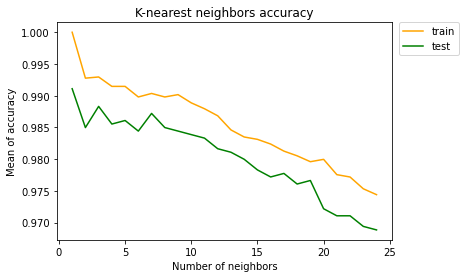

In [24]:
train_mean_accuracies = []
test_mean_accuracies = []
for k in range(1, 25):
    train_accuracies, test_accuracies = cross_validate(k, digits, target)
    train_mean_accuracies.append(np.mean(train_accuracies))
    test_mean_accuracies.append(np.mean(test_accuracies))
x = range(1, 25)
y = train_mean_accuracies
plt.plot(x, y, color = 'orange', label = 'train')
y = test_mean_accuracies
plt.plot(x, y, color = 'green', label = 'test')

plt.xlabel('Number of neighbors')
plt.ylabel('Mean of accuracy')
plt.title('K-nearest neighbors accuracy')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)

## Single-layer neural network

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

In [47]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch, max_iter=2000)
    mlp.fit(train_features, train_target)
    return mlp
    
def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_result = pd.DataFrame()
    train_result['true_result'] = test_target
    train_result['prediction'] = predictions
    accuracy = sum(train_result["prediction"] == train_result["true_result"])/len(train_result)    
    return accuracy
 
def cross_validate(n_neurons, df, target):
    kf = KFold(n_splits=4, shuffle=True)
    accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        model = train_nn(n_neurons, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        accuracies.append(accuracy)    
    return accuracies

Text(0.5, 1.0, 'Neural Network with single hidden layer')

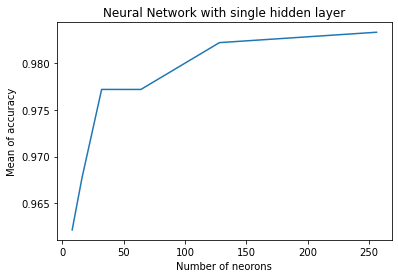

In [48]:
neurons = [(8,),
          (16,),
          (32,),
          (64,),
          (128,),
          (256,)]
mean_accuracies = []
for n in neurons:
    accuracies = cross_validate(n, digits, target)
    mean_accuracies.append(np.mean(accuracies))
x = [i[0] for i in neurons]
y = mean_accuracies
plt.plot(x, y)
plt.xlabel('Number of neorons')
plt.ylabel('Mean of accuracy')
plt.title('Neural Network with single hidden layer')

In [49]:
def cross_validate(n_neurons, df, target, nsplits = 4):
    kf = KFold(n_splits=nsplits, random_state=2, shuffle=True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        model = train_nn(n_neurons, train_features, train_target)
        train_accuracy = test(model, train_features, train_target)
        test_accuracy = test(model, test_features, test_target)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    return train_accuracies, test_accuracies
train_accuracies, test_accuracies = cross_validate((8,), digits, target)
mean_train_accuracies = np.mean(train_accuracies)
mean_test_accuracies = np.mean(test_accuracies)
print("mean_train_accuracies = ", mean_train_accuracies)
print("mean_test_accuracies = ", mean_test_accuracies)

mean_train_accuracies =  0.9990724249293408
mean_test_accuracies =  0.9538072259341748


In [50]:
def run_draw_nn(neurons, plt_title, nsplits = 4):
    train_mean_accuracies = []
    test_mean_accuracies = []
    for n in neurons:
        train_accuracies, test_accuracies = cross_validate(n, digits, target, nsplits)
        train_mean_accuracies.append(np.mean(train_accuracies))
        test_mean_accuracies.append(np.mean(test_accuracies))
    x = [i[0] for i in neurons]
    y = train_mean_accuracies
    plt.plot(x, y, color = 'orange', label = 'train')
    y = test_mean_accuracies
    plt.plot(x, y, color = 'green', label = 'test')
    plt.xlabel('Number of neurons')
    plt.ylabel('Mean of accuracy')
    plt.title(plt_title)
    plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
    return train_mean_accuracies, test_mean_accuracies

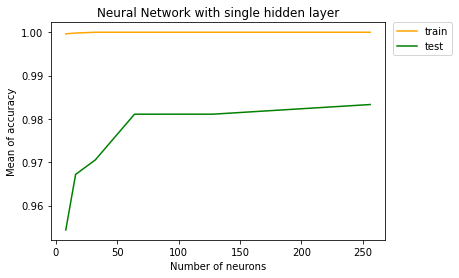

In [51]:
neurons = [(8,),
          (16,),
          (32,),
          (64,),
          (128,),
          (256,)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with single hidden layer')

In [52]:
test_mean_accuracies

[0.9543689680772086,
 0.9671789161098737,
 0.9705147240781985,
 0.981085127443702,
 0.9810876020786934,
 0.983312298935907]

In the Neural Network single layer the accuracy of the model with 256 neurons is about 98%. Neural Networks with a single layer gets very soon to 100% accuracy for the train data set but may act poorly for the test data set which is a sign of overfitting.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

## 2-layer Neural network

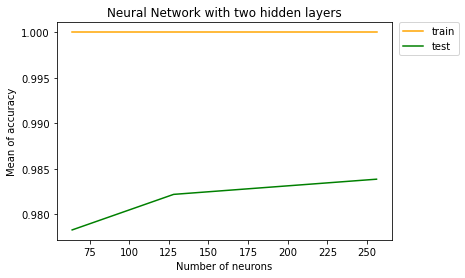

In [53]:
neurons = [(64,64),
          (128,128),
          (256,256)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with two hidden layers')

In [54]:
test_mean_accuracies

[0.9782999257609504, 0.9822011878247958, 0.9838678544914625]

The accuracy of the test data set has stayed to 98%. Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

## 3-layer Neural network w/ 6-fold cross validation

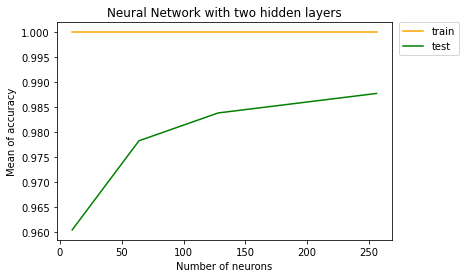

In [55]:
neurons = [(10,10,10),
          (64,64,64),
          (128,128,128), 
          (256, 256, 256)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with two hidden layers', 6)

In [56]:
test_mean_accuracies

[0.9604979561501302,
 0.9783110367892979,
 0.9838721664808622,
 0.9877684875510964]

It seems Neural Networks with three hidden layers and using 6 fold cross validation didn't improve accuracy much. There are still strong signs of overfitting.